In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import savgol_filter


# 读取数据
data_mk = pd.read_csv('1.0-0.0_2024-08-19T17-34-14MK.csv')
data_ec = pd.read_csv('1.0-0.0_2024-08-19T17-34-14EC.csv')




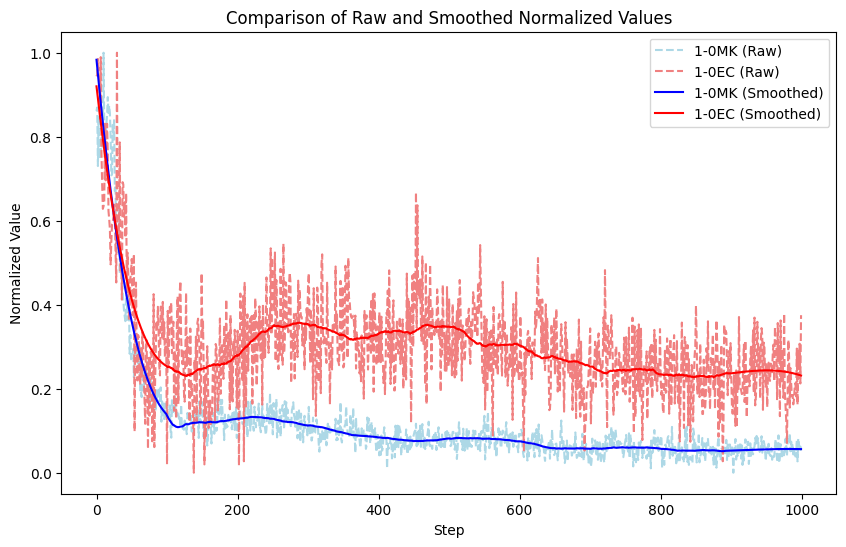

In [4]:

# 归一化处理
scaler = MinMaxScaler()
data_mk['Value_normalized'] = scaler.fit_transform(data_mk[['Value']])
data_ec['Value_normalized'] = scaler.fit_transform(data_ec[['Value']])

# 平滑处理
window_length = 200  # 窗口长度
polyorder = 3  # 多项式阶数
data_mk['Value_smoothed'] = savgol_filter(data_mk['Value_normalized'], window_length, polyorder)
data_ec['Value_smoothed'] = savgol_filter(data_ec['Value_normalized'], window_length, polyorder)

# 绘制图表
plt.figure(figsize=(10, 6))

# 原数据曲线（浅色显示）
plt.plot(data_mk['Step'], data_mk['Value_normalized'], color='lightblue', linestyle='--', label='1-0MK (Raw)')
plt.plot(data_ec['Step'], data_ec['Value_normalized'], color='lightcoral', linestyle='--', label='1-0EC (Raw)')

# 平滑后的数据曲线（深色显示）
plt.plot(data_mk['Step'], data_mk['Value_smoothed'], color='blue', label='1-0MK (Smoothed)')
plt.plot(data_ec['Step'], data_ec['Value_smoothed'], color='red', label='1-0EC (Smoothed)')

# 添加标题和标签
plt.title('Comparison of Raw and Smoothed Normalized Values')
plt.xlabel('Step')
plt.ylabel('Normalized Value')
plt.legend()

# 显示图表
plt.show()
